Proof that VIX aka "The Fear Index" displays Mean-Reverting Behavior.

When volatility jumps, it always pulls back.

Applicable when trading off volatility cycles.

"Rollover" is a safety net, it limits our exposure to false Mean-Reversion signals.

When VIX shifts from increasing regime to neutral, daily returns drop by 9.7% (neutral coefficient)

When VIX shifts to rollover, returns drop by 13.5% (rollover coefficient).

In [32]:
import pandas as pd
import statsmodels.api as sm

file_path = r"C:\Users\holde\Downloads\SPY VIX gate model v5 (Current).xlsx"
df = pd.read_excel(file_path, sheet_name="MODEL", header=2)

df['VIX Regime'] = df['VIX Regime'].astype(str).str.strip()
df['VIX'] = pd.to_numeric(df['VIX'], errors='coerce')
df = df[['Date', 'VIX', 'VIX Regime']].dropna()

df['VIX_ret'] = df['VIX'].pct_change()
df = df.dropna()

#VIX Increasing - 1 if in that regime else 0
#VIX Rollover   - 1 if in that regime else 0
#VIX Neutral is dropped as the baseline

regime_dummies = pd.get_dummies(df['VIX Regime'], drop_first=True)
print(regime_dummies.head())

X = sm.add_constant(regime_dummies)
Y = df['VIX_ret']

X = X.astype(float)
Y = Y.astype(float)

model = sm.OLS(Y, X).fit()
print(model.summary())


   VIX Neutral  VIX Rollover   nan
1        False         False  True
2        False         False  True
3        False         False  True
4        False         False  True
5        False         False  True
                            OLS Regression Results                            
Dep. Variable:                VIX_ret   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     1031.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:51:33   Log-Likelihood:                 8828.1
No. Observations:                6472   AIC:                        -1.765e+04
Df Residuals:                    6468   BIC:                        -1.762e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


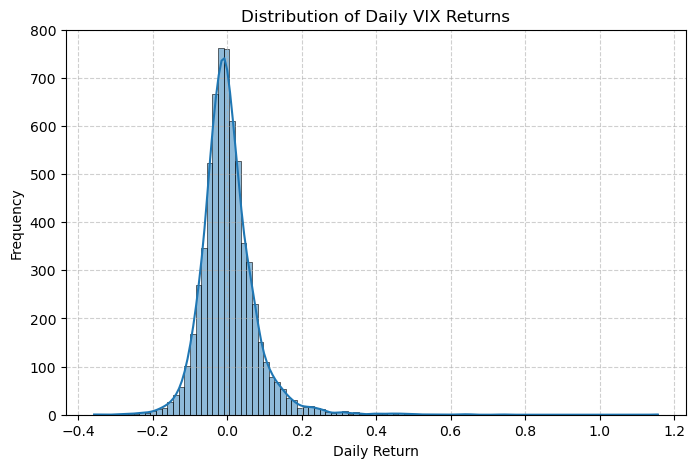

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram + kernel density estimate
plt.figure(figsize=(8,5))
sns.histplot(df['VIX_ret'], bins=100, kde=True)
plt.title('Distribution of Daily VIX Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


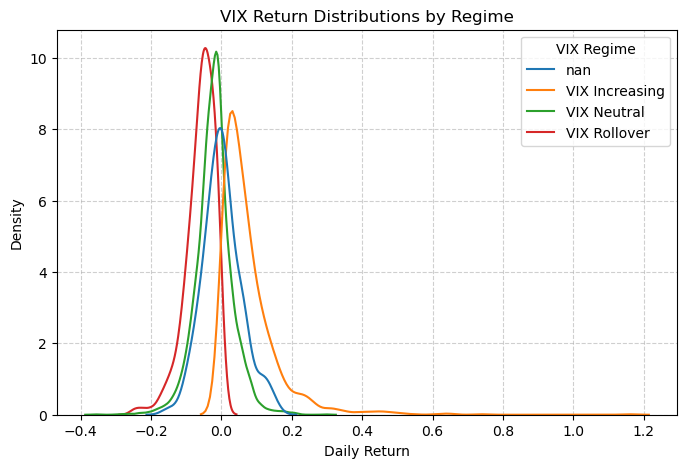

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='VIX_ret', hue='VIX Regime', common_norm=False)
plt.title('VIX Return Distributions by Regime')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


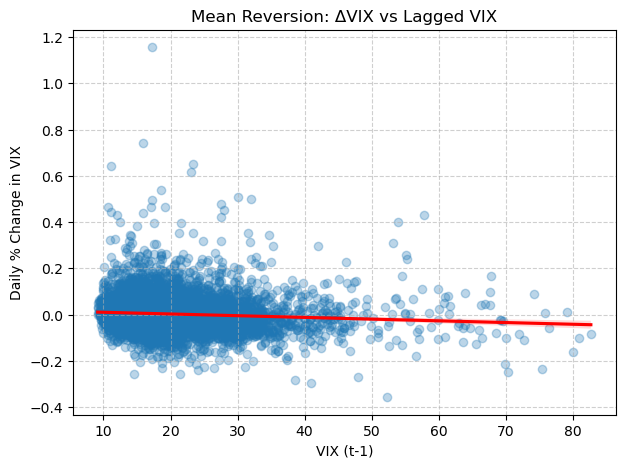

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df['LagVIX'] = df['VIX'].shift(1)
plt.figure(figsize=(7,5))
sns.regplot(x='LagVIX', y='VIX_ret', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Mean Reversion: ΔVIX vs Lagged VIX')
plt.xlabel('VIX (t-1)')
plt.ylabel('Daily % Change in VIX')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

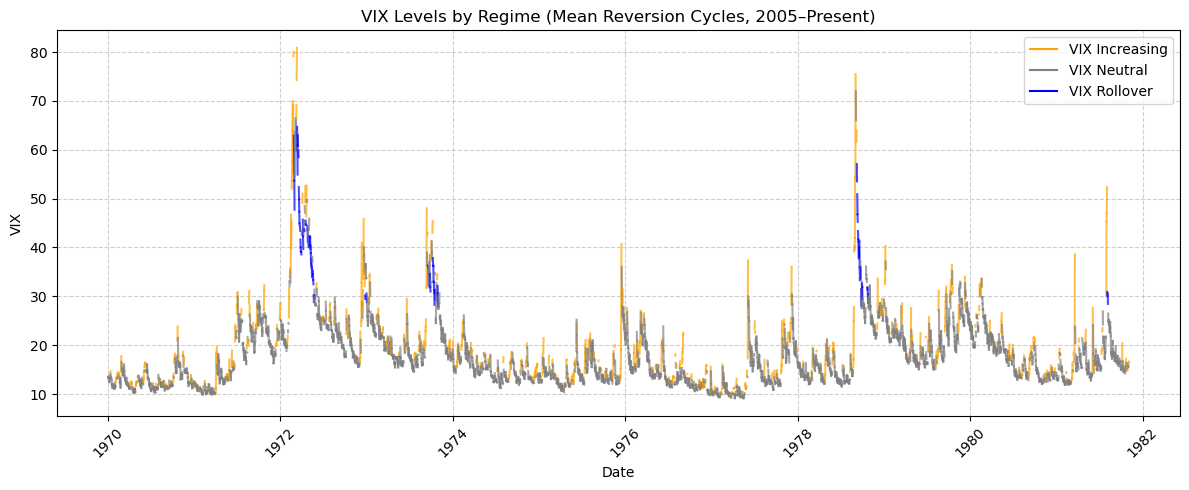

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = df[df['Date'] >= '2005-01-01']

plt.figure(figsize=(12,5))

for i in range(1, len(df)):
    regime_now = df['VIX Regime'].iloc[i]
    regime_prev = df['VIX Regime'].iloc[i-1]
    if regime_now == regime_prev:
        plt.plot(df['Date'].iloc[i-1:i+1],
                 df['VIX'].iloc[i-1:i+1],
                 color=colors.get(regime_now, 'black'),
                 alpha=0.7)

plt.title('VIX Levels by Regime (Mean Reversion Cycles, 2005–Present)')
plt.xlabel('Date')
plt.ylabel('VIX')

plt.legend(handles=[plt.Line2D([0],[0], color=c, label=r) for r,c in colors.items()])
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

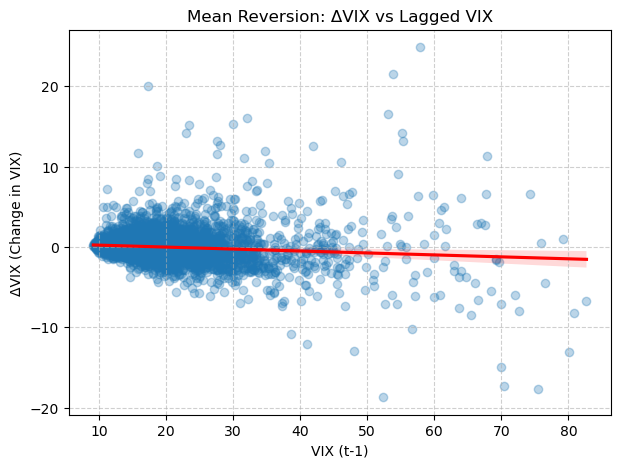

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

df['LagVIX'] = df['VIX'].shift(1)
df['DeltaVIX'] = df['VIX'] - df['LagVIX']

plt.figure(figsize=(7,5))
sns.regplot(x='LagVIX', y='DeltaVIX', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Mean Reversion: ΔVIX vs Lagged VIX')
plt.xlabel('VIX (t-1)')
plt.ylabel('ΔVIX (Change in VIX)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

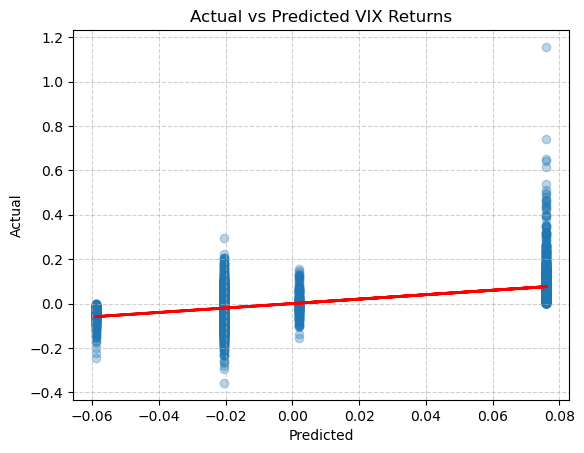

In [38]:
plt.scatter(model.fittedvalues, Y, alpha=0.3)
plt.plot(model.fittedvalues, model.fittedvalues, color='red', lw=2)
plt.title('Actual vs Predicted VIX Returns')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

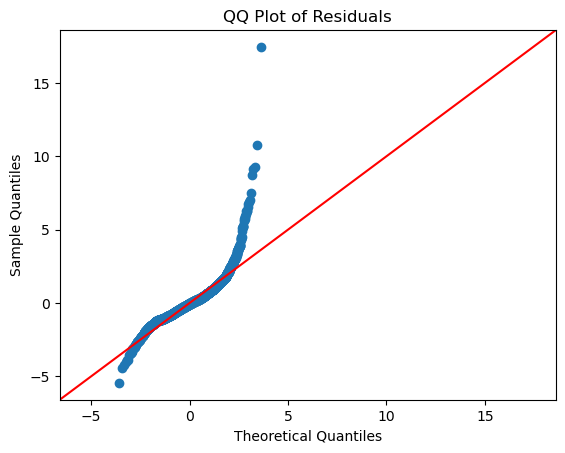

In [39]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()